# Wine Type Classification

## Importing the dataset

In [1]:
# We imported these needed libraries for data manipulation, visualization and prediction

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH="./Data/"

In [3]:
# We get the wine data from the csv file
dfr = pd.read_csv(DATA_PATH+"winequality-red.csv",sep=';')
dfw = pd.read_csv(DATA_PATH+"winequality-white.csv",sep=';')

In [4]:
# We show the first 5 rows of red wine data then white wine
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
print("Shape of red wine data: ",dfr.shape)
print("Shape of white wine data: ",dfw.shape)
print("Total number of entries: ", dfr.shape[0]+dfw.shape[0])

Shape of red wine data:  (1599, 12)
Shape of white wine data:  (4898, 12)
Total number of entries:  6497


Our dataframe is composed of 12 features and 6497 wine entries in total.

In [7]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We have 12 caracteristics of wine of type float but no red or white label.

## Preprocessing the data

In [8]:
# We add a new type column with the label
dfr["Type"]="Red"
dfw["Type"]="White"

In [9]:
# We merge the datasets into one dataframe
df= pd.concat([dfr,dfw],ignore_index=True)

In [10]:
# We encode the type label to 0 and 1 instead of red and white
df['type_enc'] = df['Type'].astype('category').cat.codes
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,type_enc
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,0


## Data Analysis and Visualization

In [32]:
# We show general statistics about each feature
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


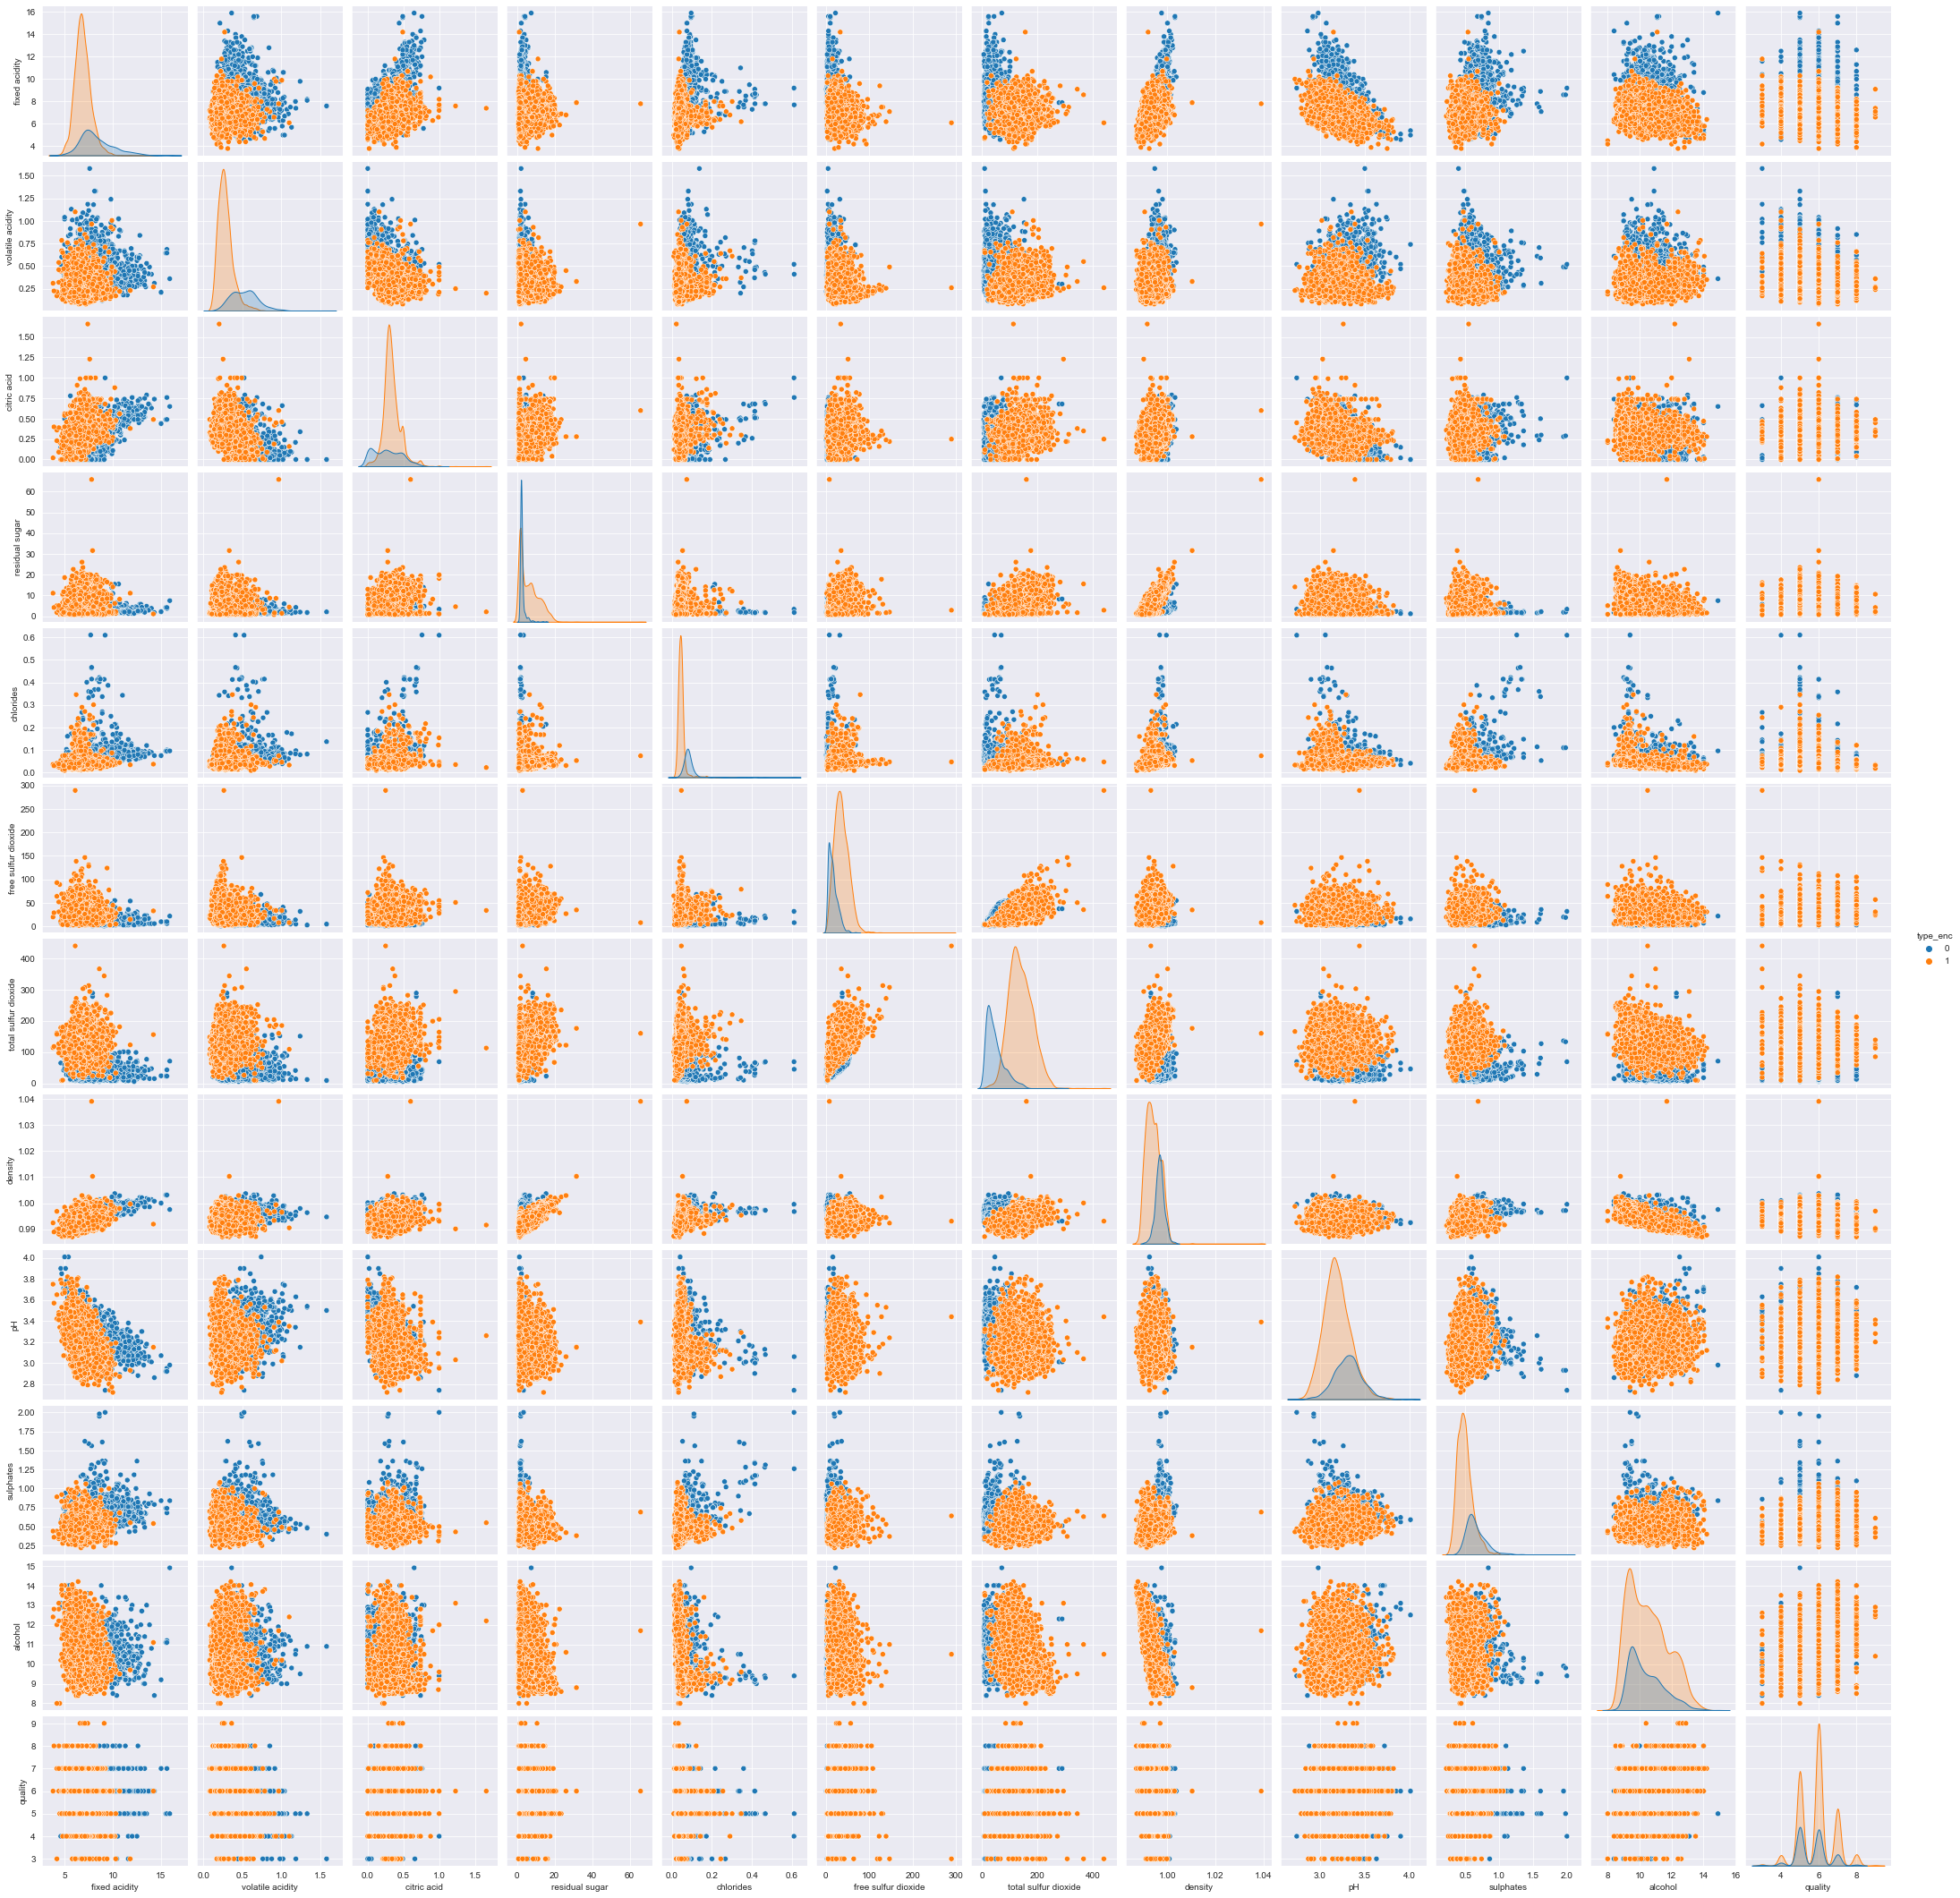

In [33]:
# We show the pair plot of each feature with the rest of features to visualize their relationships
sns.pairplot(df,hue='type_enc')

In [34]:
# We show the correlation between the different features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


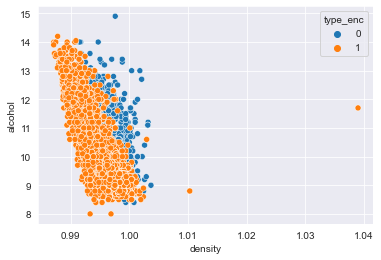

In [11]:
# We show the scatter plot of the most correlated features which are density and alcohol
sns.scatterplot(data=df, x='density', y='alcohol', hue='type_enc')
plt.show()

In [12]:
# We noticed there are outlier entries in the data so we're going to remove them from the dataset
q = df["density"].quantile(0.999)
df=df[df["density"] < q]

Text(0.5, 1.0, 'Quality')

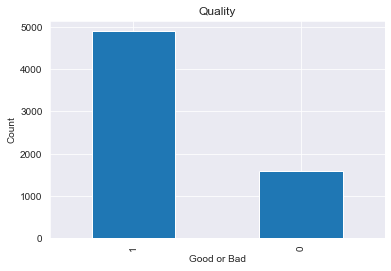

In [13]:
# We show the balance of labels with a bar plot
df.type_enc.value_counts().plot(kind='bar')
plt.xlabel("Good or Bad")
plt.ylabel("Count")
plt.title("Quality")

<AxesSubplot:title={'center':'Percentage of red and white quality wine'}, ylabel='type_enc'>

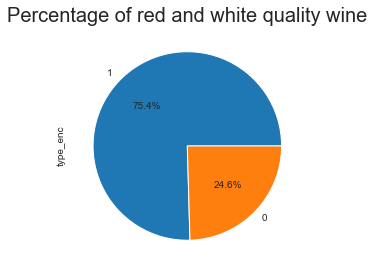

In [14]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
plt.subplot(141)
plt.title('Percentage of red and white quality wine',fontsize = 20)
df['type_enc'].value_counts().plot.pie(autopct="%1.1f%%")

We conclude that we have an unbalanced dataset with far more white wine examples than red wine which will affect the model training performances.

## Preparing the model and the data for training

In [15]:
# We drop the string label
df1 = df.drop('Type',axis=1)

In [16]:
# We separate our data to X which has the features and Y which has the label
X = df1.drop('type_enc',axis=1)
Y = df1['type_enc']

In [17]:
# We split our dataset into 80% training data and 20% validation data
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=0,stratify=Y)

In [18]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (5190, 12)
X_test shape:  (1298, 12)
Y_train shape:  (5190,)
Y_test shape:  (1298,)


### Implementing logistic Regression Using Sklearn

In [19]:
# We use StandardScaler to normalize the features for better and faster results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# We train our data
lr = LogisticRegression()
lr.fit(X_train ,y_train)

LogisticRegression()

## Training validation

In [36]:
# We predict the test data using the trained logistic regression model
y_pred = lr.predict(X_test)

[1 1 1 ... 1 1 0]


In [22]:
# We use sklearn to get the prediction results
print(lr.score(X_test,y_test))
metrics.accuracy_score(y_test,y_pred)

0.9946070878274268


0.9946070878274268

In [23]:
# The predictions are percentages, so we convert them to 0 and 1 labels
y_pred = np.where(y_pred>0.5,1,0)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

## Analyzing the results

<AxesSubplot:>

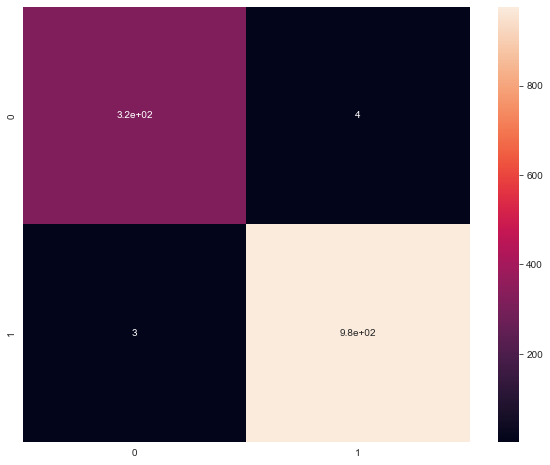

In [24]:
# We plot the confusion matrix of the predictions
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [25]:
# We show other metrics
target_names = ['Bad', 'Good']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.99      0.99      0.99       319
        Good       1.00      1.00      1.00       979

    accuracy                           0.99      1298
   macro avg       0.99      0.99      0.99      1298
weighted avg       0.99      0.99      0.99      1298



## Type Inference

In [44]:
# We define a function that takes input and predicts its type
def predict(model,input):
    output=lr.predict(input)
    return ["White", "Red"][output[0]]

In [45]:
# We have the data of a wine and we're going to determine if it's red or white
wine=np.array([8.9, 0.22, 0.48, 1.8, 0.0077, 29.0, 60.0, 0.9968,3.39, 0.53, 9.4, 6.0]).reshape((1,-1))
wineType=predict(lr,wine)

print("The type of this wine is "+wineType)


The type of this wine is Red


Our model did really well with 99% accuracy.